In [4]:
from system import *
import pandas as pd
import numpy as np
import tulipy as ti
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
sns.set('paper')

In [10]:
import pandas_datareader.data as web

In [12]:
import datetime
import requests_cache
from tqdm import tqdm

In [70]:
from torchviz import make_dot

In [71]:
from wsb_pipeline import *

No GPU will be used


In [70]:
from torchviz import make_dot

In [71]:
from agents import *

No GPU will be used


In [2]:
%matplotlib inline

In [3]:
amzn_env = TradingEnv('AMZN')

In [16]:
amzn_env.data

,x,diff_x,std,sharpe,q,prices
Date,,,,,,
2013-11-08,-4.141182,-0.011551,NaN,0.000000,0.000000,350.309998
2013-11-11,-4.129630,0.013780,NaN,0.000000,0.002021,354.380005
2013-11-12,-4.143411,-0.018959,NaN,0.000000,0.000969,349.529999
2013-11-13,-4.124451,-0.030903,NaN,0.000000,-0.000818,356.220001
2013-11-14,-4.093549,-0.004806,NaN,0.000000,-0.000128,367.399994
...,...,...,...,...,...,...
2017-12-28,-2.921574,0.014120,0.007688,-0.066098,0.001410,1186.099976
2017-12-29,-2.935694,-0.016570,0.007117,-0.150984,-0.000084,1169.469971
2018-01-02,-2.919124,-0.012694,0.007450,-0.277704,-0.000944,1189.010010


In [17]:
df= amzn_env.data
df['prices'] = amzn_env.prices
df.head()

,x,diff_x,std,sharpe,q,prices
Date,,,,,,
2013-11-08,-4.141182,-0.011551,NaN,0.0,0.000000,350.309998
2013-11-11,-4.129630,0.013780,NaN,0.0,0.002021,354.380005
2013-11-12,-4.143411,-0.018959,NaN,0.0,0.000969,349.529999
2013-11-13,-4.124451,-0.030903,NaN,0.0,-0.000818,356.220001
2013-11-14,-4.093549,-0.004806,NaN,0.0,-0.000128,367.399994


x            AxesSubplot(0.125,0.125;0.110714x0.755)
diff_x    AxesSubplot(0.257857,0.125;0.110714x0.755)
std       AxesSubplot(0.390714,0.125;0.110714x0.755)
sharpe    AxesSubplot(0.523571,0.125;0.110714x0.755)
q         AxesSubplot(0.656429,0.125;0.110714x0.755)
prices    AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

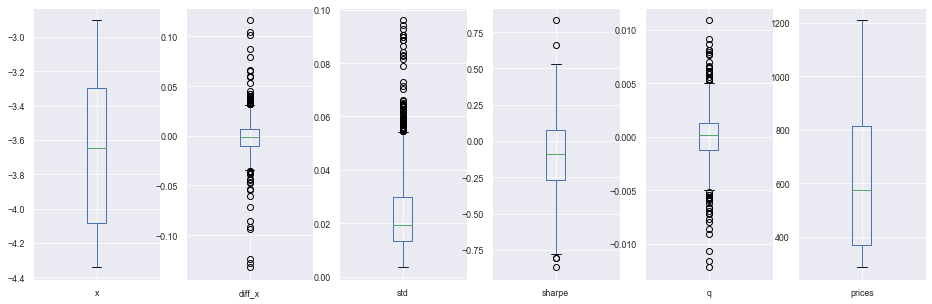

In [18]:
df.plot(kind='box', subplots=True, figsize=(16, 5))

[]

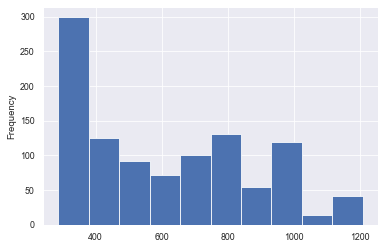

In [19]:
df['prices'].plot(kind='hist')
plt.plot()

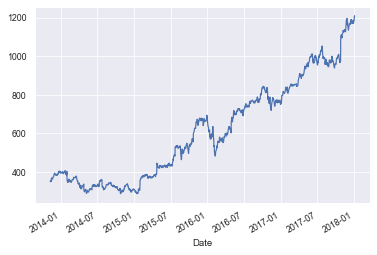

In [8]:
df['prices'].plot()
plt.show()

In [113]:
prices[:tt.WINDOW_SIZE].std()

11.091337327865284

In [53]:
prices.diff().shift(-1)

Date
2013-11-08     4.070007
2013-11-11    -4.850006
2013-11-12     6.690002
2013-11-13    11.179993
2013-11-14     1.770020
                ...    
2017-12-28   -16.630005
2017-12-29    19.540039
2018-01-02    15.189941
2018-01-03     5.390015
2018-01-04          NaN
Name: prices, Length: 1046, dtype: float64

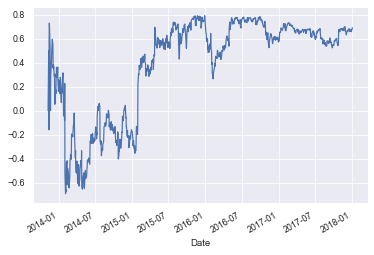

In [54]:
prices = df['prices']
min_prices = prices.expanding().min()#.shift(-1)
max_prices = prices.expanding().max()#.shift(-1)
width = max_prices - min_prices
width[0] = width[1]
center = prices.expanding().median()#.shift(-1)
scaled_prices = (prices - center) / width
scaled_prices.plot()

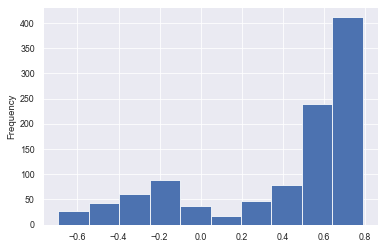

In [48]:
scaled_prices.plot(kind='hist')

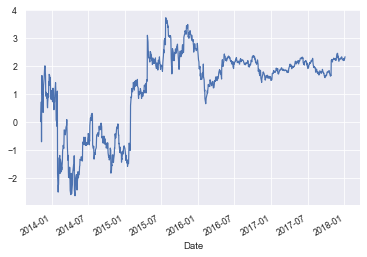

In [55]:
prices_mean = prices.expanding().mean()
prices_std = prices.expanding().std()
prices_std[0] = prices_std[1]
prices_normalized = (prices - prices_mean) / prices_std
prices_normalized.plot()

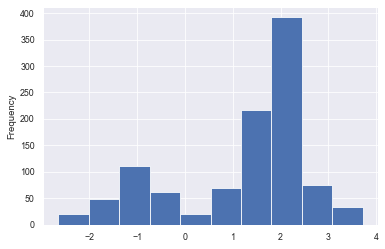

In [56]:
prices_normalized.plot(kind='hist')

In [46]:
prices.expanding().std().shift(-1).fillna(np.Inf)

Date
2013-11-08      2.877930
2013-11-11      2.604353
2013-11-12      3.211513
2013-11-13      7.175245
2013-11-14      8.486643
                 ...    
2017-12-28    255.709519
2017-12-29    256.212072
2018-01-02    256.744612
2018-01-03    257.285699
2018-01-04           inf
Name: prices, Length: 1046, dtype: float64

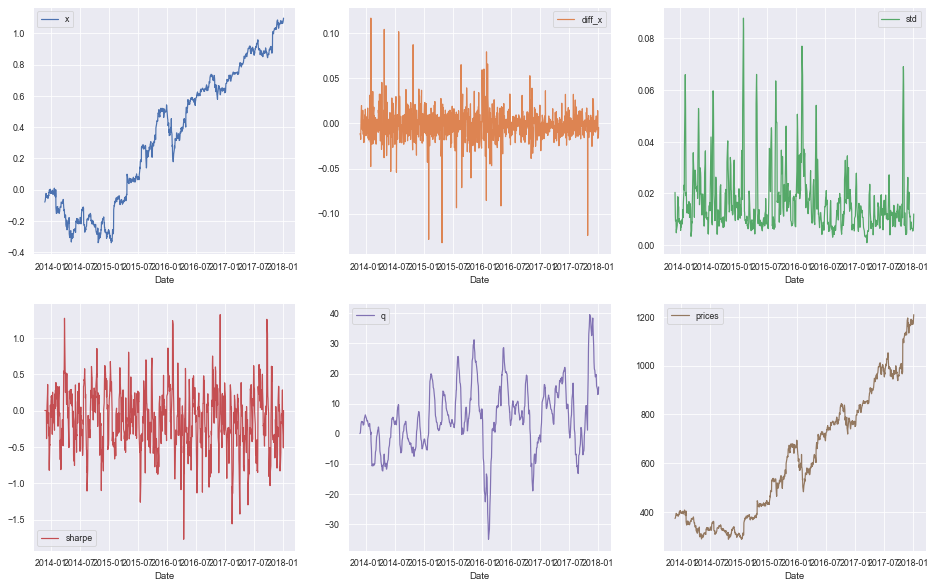

In [31]:
df.plot(subplots=True, layout=(2,3), figsize=(16,10), kind='line', sharex=False, sharey=False)
plt.show()

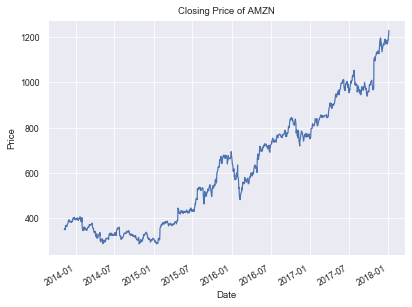

In [15]:
rcParams['figure.figsize'] = (6.4, 4.8)
amzn_env = TradingWithRedditEnv('AMZN')
amzn_env.prices.plot()


plt.ylabel('Price')
plt.title('Closing Price of AMZN')
plt.savefig('plots/nonstationary-prices-amazon.svg')
plt.show()

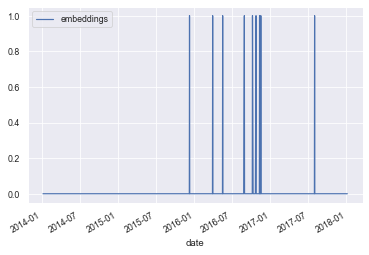

In [153]:
amzn_env = TradingWithRedditEnv('AMZN')
amzn_env.embedding_lookup.groupby('date').count().plot()

In [116]:
DATABASE_URI = "sqlite:///ft_database.db"
q = f"""
        SELECT date, body, embeddings 
        from wsb
        where body LIKE '%amzn%'
        order by date
"""
db = create_engine(DATABASE_URI)
df = pd.read_sql_query(q, db)
df

,date,body,embeddings
0,2012-04-13,[AMZN earnings on 4/26](http://www.sys-con.com...,"[-0.024429066106677055, -0.17460773885250092, ..."
1,2012-04-23,Couldn't agree with you more on that. I am ind...,"[-0.05230492353439331, -0.2699194550514221, 0...."
2,2012-04-24,edit-- Panera Bread* co.\n\nMy take is short P...,"[-0.01629757136106491, -0.20110610127449036, 0..."
3,2012-04-25,LVS misbehaving in AH trading. CTXS looking go...,"[-0.07617493718862534, -0.2212861031293869, 0...."
4,2012-04-26,WSJ ran an article today that was pretty long-...,"[0.001350987353362143, -0.24152812361717224, 0..."
...,...,...,...
3349,2018-09-30,"�� Don't fuck with AMZN targets, unless their ...","[-0.0317537896335125, -0.15290068089962006, -0..."
3350,2018-09-30,I read it as well. I guess AMZN was intereste...,"[-0.148174449801445, -0.3502190113067627, 0.06..."
3351,2018-09-30,Yolo all I have on AMZN while it's still sitti...,"[-0.05302746593952179, -0.23600880801677704, 0..."
3352,2018-09-30,AMZN * Ad growth is going to take people by st...,"[-0.0661204606294632, -0.20915824174880981, 0...."


In [150]:
pd.set_option('display.max_colwidth', -1) 
df[['date', 'body']][365:385].to_string()

/home/aaruran/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


"           date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 body\n365  2015-12-22                                                                                                                                  

In [114]:
# DATABASE_URI = "sqlite:///ft_database.db"
# q = f"""
#         SELECT date, body, embeddings 
#         from wsb
#         where body LIKE 'amzn'
#         order by date
# """
# db = create_engine(DATABASE_URI)
# df = pd.read_sql_query(q, db)
# df

,date,body,embeddings
0,2012-07-18,AMZN,"[-0.4480002522468567, -0.37491554021835327, 0...."
1,2016-03-30,Amzn,"[-0.5042296648025513, -0.1718885898590088, 0.1..."
2,2016-05-08,Amzn,"[-0.5042296648025513, -0.1718885898590088, 0.1..."
3,2016-05-17,AMZN,"[-0.4480002522468567, -0.37491554021835327, 0...."
4,2016-08-29,AMZN,"[-0.4480002522468567, -0.37491554021835327, 0...."
5,2016-10-24,Amzn,"[-0.5042296648025513, -0.1718885898590088, 0.1..."
6,2016-10-30,Amzn,"[-0.5042296648025513, -0.1718885898590088, 0.1..."
7,2016-11-10,AMZN,"[-0.4480002522468567, -0.37491554021835327, 0...."
8,2016-11-16,AMZN,"[-0.4480002522468567, -0.37491554021835327, 0...."
9,2017-08-01,AMZN,"[-0.4480002522468567, -0.37491554021835327, 0...."


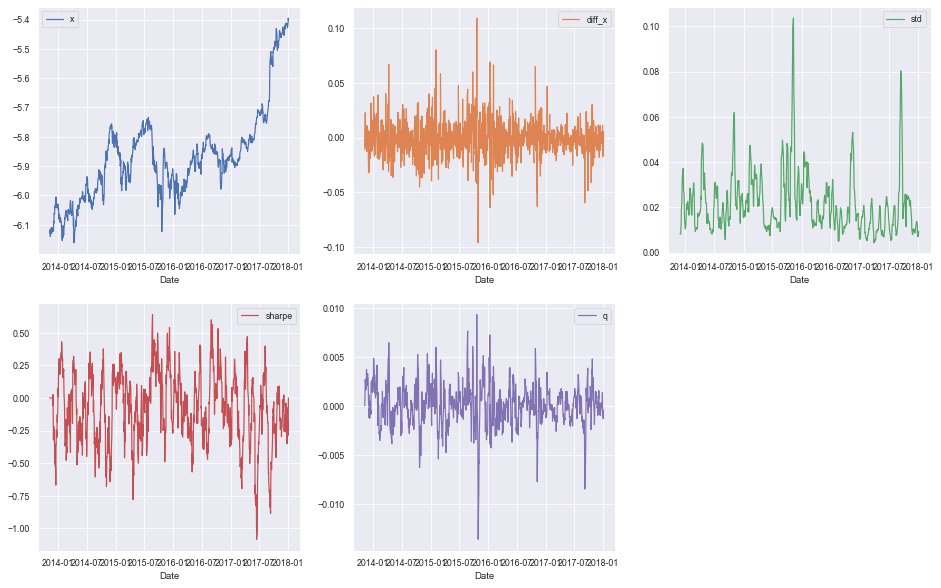

In [10]:
abbv_env = TradingEnv('ABBV')
abbv_env.data.plot(subplots=True, layout=(2,3), figsize=(16,10), kind='line', sharex=False, sharey=False)
plt.show()

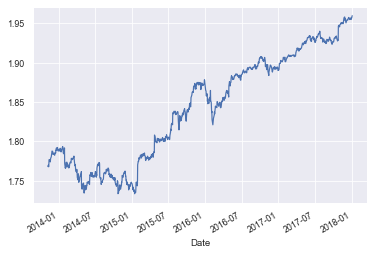

In [15]:
df['prices'].apply(np.log).apply(np.log).plot()

In [61]:
macd = ti.macd(prices.values, 12, 26, 14)

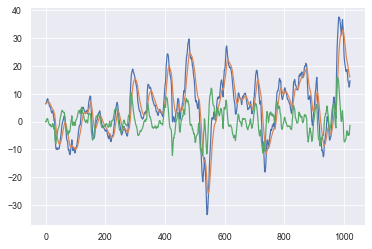

In [65]:
plt.plot(macd[0])
plt.plot(macd[1])
plt.plot(macd[2])

In [66]:
macd[0] - macd[1]

array([ 0.        , -0.1526299 ,  0.2259009 , ..., -4.07518054,
       -2.57607065, -1.26395574])

(array([  7.,   9.,  24., 128., 209., 329., 166., 100.,  29.,  20.]),
 array([-33.41533834, -26.30828402, -19.20122971, -12.09417539,
         -4.98712107,   2.11993325,   9.22698757,  16.33404189,
         23.44109621,  30.54815053,  37.65520485]),
 <a list of 10 Patch objects>)

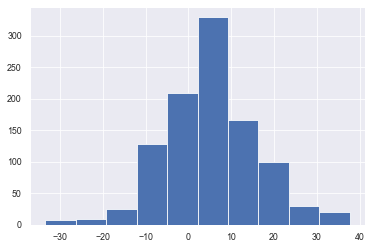

In [71]:
plt.hist(macd[0])

In [70]:
len(prices) - len(macd[2])

25

In [75]:
len(prices[25:]) - len(macd[2])

0

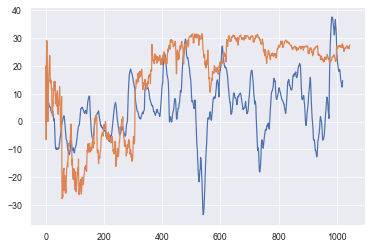

In [81]:
plt.plot(macd[0])
plt.plot(scaled_prices.values * 40)

In [105]:
df['q'][25:] - macd[0]

Date
2013-12-16    -6.529507
2013-12-17    -6.355088
2013-12-18    -6.767854
2013-12-19    -6.960063
2013-12-20    -7.557374
                ...    
2017-12-28   -13.937866
2017-12-29   -12.422721
2018-01-02   -12.556872
2018-01-03   -13.659670
2018-01-04   -14.777331
Name: q, Length: 1021, dtype: float64

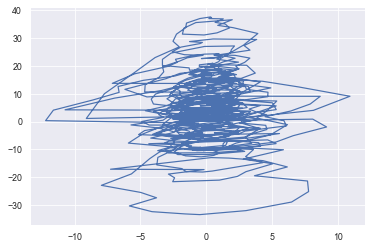

In [112]:
# plt.plot()
plt.plot(df['q'].values[25:] *1e3, macd[0])

In [93]:
tt = TradingEnv('TT')

In [97]:
# tt.data
tt.prices[:tt.WINDOW_SIZE].std()

0.0

In [122]:
env = TradingEnv(ticker='AMZN')
state = env.reset()
assert env.prices[:env.WINDOW_SIZE].std() > 0, "Standard Deviation too low"
done = False
while not done:
    action = 1
    next_state, r, done, _ = env.step(action)
#     assert len(state) == len(next_state)
assert len(env.returns_list) == len(env.actions_list)
h = env.close()

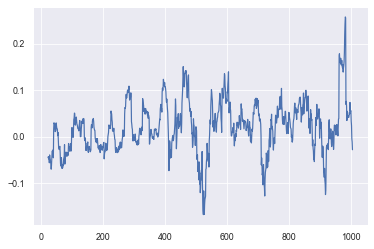

In [138]:
# len(pd.Series(env.values).diff())
pd.Series(env.values).diff().dropna().rolling(22).mean().plot()

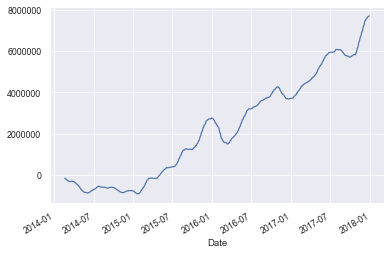

In [133]:
h.returns.rolling(30).mean().plot()

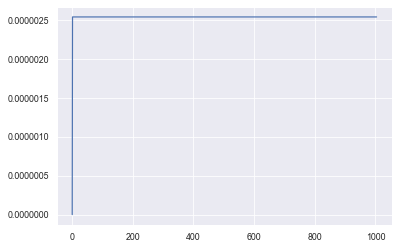

In [141]:
plt.plot(env.cumulative_costs)

In [2]:
h = pd.read_csv('training_history.csv')

In [3]:
h.head()

,date,ticker,rewards,actions,returns,prices,t,episode,agent,discounted_reward
0,2014-01-06,A,-9.951808,-1.0,0.004919,40.515022,0,1,Deep Q-Network,-9.951808
1,2014-01-07,A,-10.050197,0.0,0.002453,41.094421,1,1,Deep Q-Network,-8.040158
2,2014-01-08,A,-10.214623,-1.0,-0.003828,41.766811,2,1,Deep Q-Network,-6.537358
3,2014-01-09,A,-19.768124,1.0,-0.002243,41.781116,3,1,Deep Q-Network,-10.121280
4,2014-01-10,A,-9.889141,0.0,-0.001872,42.153076,4,1,Deep Q-Network,-4.050592


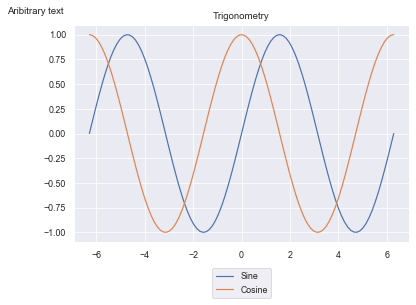

In [6]:
# plt.gcf().clear()
# fig = plt.figure(1)
# ax = fig.add_subplot(111)

# x = np.linspace(-2*np.pi, 2*np.pi, 100)
# ax.plot(x, np.sin(x), label="Sine")
# ax.plot(x, np.cos(x), label="Cosine")
# handles, labels = ax.get_legend_handles_labels()
# lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
# text = ax.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)
# ax.set_title("Trigonometry")
# ax.grid('on')
# fig.savefig('samplefigure.svg', bbox_extra_artists=(lgd,text), bbox_inches='tight')

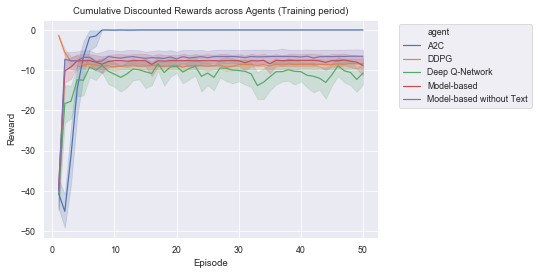

In [14]:
plt.gcf().clear()
fig = plt.figure(1)

sns.set('paper')
ax = sns.lineplot(
    'episode', 'discounted_reward', hue='agent',
    data=(h.groupby(['agent', 'ticker', 'episode'])
          .agg({'discounted_reward' : 'sum'}).reset_index(['agent', 'episode'], drop=False))
)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1.05, 1))
# text = ax.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)

ax.set_title('Cumulative Discounted Rewards across Agents (Training period)')
ax.grid('on')
# plt.title('Cumulative Discounted Rewards across Agents (Training period)')
plt.ylabel('Reward')
plt.xlabel('Episode')
fig.savefig('samplefigure.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [9]:
with open("filtered_tickers.txt", "r") as src:
    filtered_tickers = src.read().split("\n")

In [13]:
prices = pd.DataFrame()
for i in tqdm(range(len(filtered_tickers))):
    t = filtered_tickers[i]
    e = TradingEnv(ticker=t, mode='test')
    prices[t] = e.prices[e.df_initial_index : e.df_final_index]

100%|██████████| 386/386 [00:11<00:00, 35.08it/s]


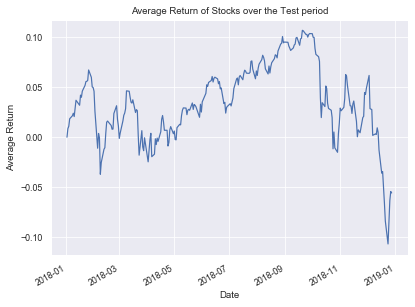

In [14]:
rcParams['figure.figsize'] = (6.4, 4.8)
averaged_prices = prices.T.mean()
init_price = averaged_prices[0]
init_price
averaged_returns = (averaged_prices - init_price) / init_price
averaged_returns.plot()
plt.title('Average Return of Stocks over the Test period')
plt.ylabel('Average Return')
plt.savefig('plots/average-prices.svg')

In [66]:
# prices.T.std().plot()

In [40]:
prices.pivot_table()

Symbols,AEE,AEP,AES,AFL,AIG
Date,,,,,
2017-12-20,58.689999,74.500000,10.58,43.680000,60.000000
2017-12-21,58.369999,73.739998,10.62,43.555000,60.080002
2017-12-22,58.689999,73.650002,10.71,43.605000,59.310001
2017-12-26,58.299999,72.989998,10.64,43.820000,59.430000
2017-12-27,58.700001,73.239998,10.67,43.855000,59.540001
...,...,...,...,...,...
2018-12-31,65.230003,74.739998,14.46,45.560001,39.410000
2019-01-02,63.529999,72.940002,14.18,45.520000,39.619999
2019-01-03,63.689999,72.769997,14.17,44.369999,38.750000


In [44]:
prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-20,67.400002,51.919998,98.589996,174.350006,97.410004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-21,67.519997,52.790001,100.129997,175.009995,97.910004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-22,67.349998,52.590000,100.550003,175.009995,98.209999,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-26,67.250000,52.849998,101.959999,170.570007,97.750000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-27,67.300003,52.400002,99.769997,170.600006,98.089996,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.540001
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.480003
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.559998


In [48]:
prices['A'].isna().sum()

20174

In [49]:
env = TradingEnv('A', mode='test')
env.prices

Date
2017-11-06    68.220001
2017-11-07    68.250000
2017-11-08    68.110001
2017-11-09    67.470001
2017-11-10    66.809998
                ...    
2018-12-31    67.459999
2019-01-02    65.690002
2019-01-03    63.270000
2019-01-04    65.459999
2019-01-07    66.849998
Name: Close, Length: 293, dtype: float64

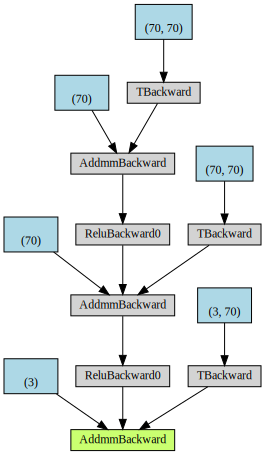

In [76]:
model = QNetwork()
s0 = TradingEnv().reset()
x = FloatTensor([s0])
y = model(x)
make_dot(y)

In [88]:
DATABASE_URI = "sqlite:///ft_database.db"
q = f"""
        SELECT date, body, embeddings 
        from wsb
        where '{ticker}' LIKE body
        order by date
"""
db = create_engine(DATABASE_URI)
df = pd.read_sql_query(q, db)

In [89]:
get_all_embeddings('AAPL')

,date,embeddings
0,2014-10-14,"[-0.03803207725286484, 0.0013342425227165222, ..."
1,2015-06-03,"[-0.4903160035610199, -0.3853575885295868, 0.2..."
2,2015-06-10,"[-0.4903160035610199, -0.3853575885295868, 0.2..."
3,2015-08-25,"[-0.4903160035610199, -0.3853575885295868, 0.2..."
4,2015-09-08,"[-0.4903160035610199, -0.3853575885295868, 0.2..."
5,2015-11-19,"[-0.4903160035610199, -0.3853575885295868, 0.2..."
6,2015-12-10,"[-1.143259048461914, -0.9430350661277771, 0.92..."
7,2015-12-17,"[-0.4903160035610199, -0.3853575885295868, 0.2..."
8,2015-12-20,"[-0.4903160035610199, -0.3853575885295868, 0.2..."
9,2016-01-09,"[-0.4903160035610199, -0.3853575885295868, 0.2..."
